In [2]:
from fft_tdse_simulator.simulator import *
from fft_tdse_simulator.animator import *
import matplotlib.pyplot as plt
import numpy as np


def potential(x):
    Vmax = 4
    return Vmax * (np.arctan(x/2) / np.pi + .5)
#    return -1.0 * np.exp(-.1*x*x)

def init_wavefunction(x, sigma = 1.0, k0 = 2.0, x0 = -20.0):
    norm = 1.0/np.sqrt(sigma*np.sqrt(np.pi))
    return np.exp(-(x-x0)**2/(2*sigma) + 1j*k0*x) * norm

laser = LaserPulse(omega=0.4, t0 = 0, T = 80, E0 = 0.0)


sim1 = Simulator(verbose=True)
sim1.set_dimension(1)
sim1.set_initial_condition(lambda x: init_wavefunction(x))
sim1.set_mass(1.0)
sim1.set_charge(-1.0)
sim1.set_potential(lambda x: potential(x))
sim1.set_laser_pulse(laser)
sim1.set_grid(-400, 400, 2048)
sim1.set_time_parameters(0.0, 100.0, 40000)
sim1.prepare()

plt.figure()
plt.plot(sim1.t_grid, laser(sim1.t_grid))
plt.show()
plt.figure()
plt.plot(sim1.x, sim1.psi.real, sim1.x, sim1.psi.imag)
plt.show()


ModuleNotFoundError: No module named 'fft_tdse_simulator'

In [2]:
norm_hist = np.zeros_like(sim1.t_grid)
norm_hist[0] = sim1.wf.psiNorm()

anim = Animator1d(sim1)
anim.set_interval(80)

anim_callback = anim.get_callback()

def callback(sim):
    norm_hist[sim.t_index+1] = sim.wf.psiNorm()
    anim_callback(sim)

sim1.simulate(callback=callback)
anim.make_movie("test.mp4")


ic| self.format: './frames/frame%05d.png'
ic| Vmax: 3.9936276324157225, Vmin: 0.006366144672823593
ic| 'Running simulation...'


  0%|          | 0/40000 [00:00<?, ?it/s]

ic| len(self.frame_list): 500
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvb

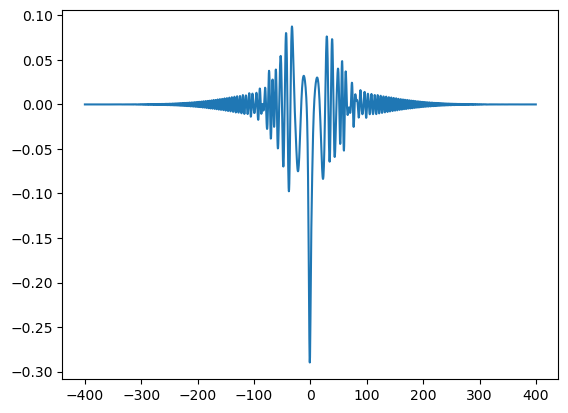

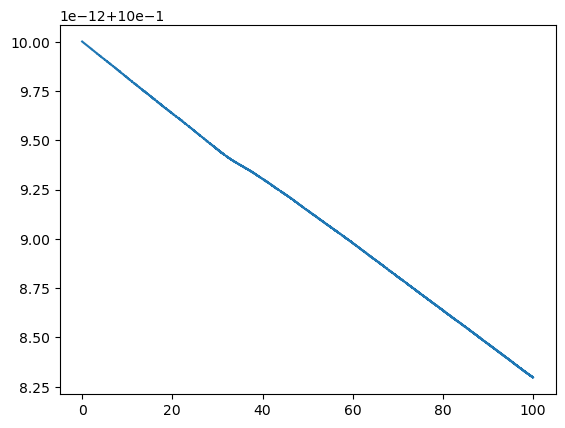

In [11]:
import matplotlib.pyplot as plt

x = sim1.x
y = sim1.psi.imag
plt.figure()
plt.plot(x, y)
plt.show()
plt.figure()
plt.plot(sim1.t_grid, norm_hist)
plt.show()


In [4]:
sim1.t

99.99000000000001